In [17]:
crsid='test' #your crsid
%run /root/$crsid/L50/Jupyter/useful/useful.py
%run /root/$crsid/L50/Jupyter/useful/useful1.py
%matplotlib inline
machB_ip = '' # XXX REPLACE THIS WITH THE IP of the host 128.232.XXX.YYY
cvm='c1/vm0'

### Experiment 1
Ping 500 times. Plot the CDF of RTTs.

#### vm1 

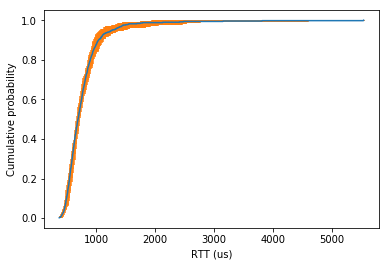

In [18]:
graph1('1/10.0.0.6/exp1',2,10.0,500,cvm)

#### vm2

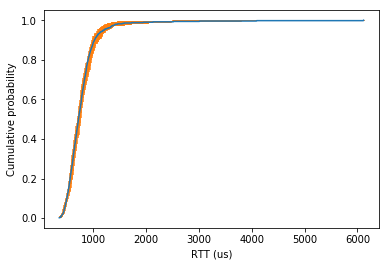

In [19]:
graph1('1/10.0.0.7/exp1',2,10.0,500,cvm)

#### vm3

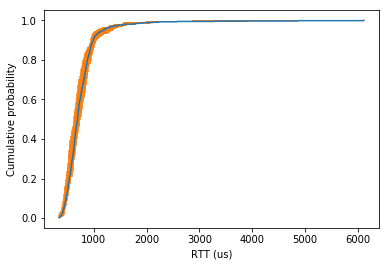

In [20]:
graph1('1/10.0.0.8/exp1',2,10.0,500,cvm)

#### vm4

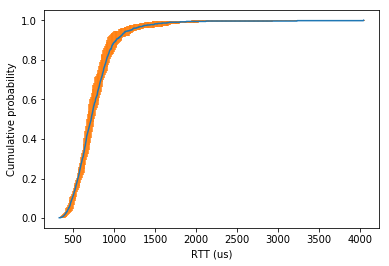

In [21]:
graph1('1/10.0.0.4/exp1',2,10.0,500,cvm)

#### Experiment 2
Ping 1000 times to other vms. Plot the CDF of RTTs.

#### vm1

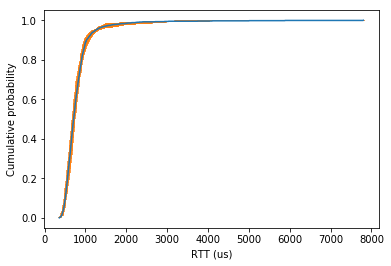

In [22]:
graph1('2/10.0.0.6/exp2',2,10.0,1000,cvm)

#### vm2

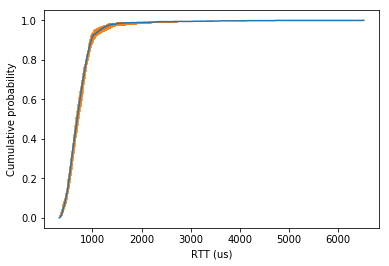

In [23]:
graph1('2/10.0.0.7/exp2',2,10.0,1000,cvm)

#### vm3

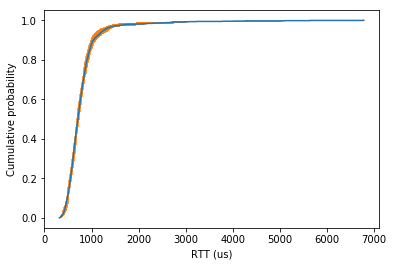

In [24]:
graph1('2/10.0.0.8/exp2',2,10.0,1000,cvm)

#### vm4

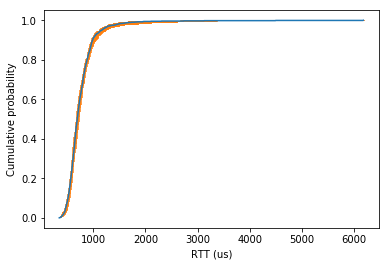

In [25]:
graph1('2/10.0.0.4/exp2',2,10.0,1000,cvm)

#### Experiment 3
Ping 500 times with varying intervals. Plot the CDFs of RTTs.

#### vm1

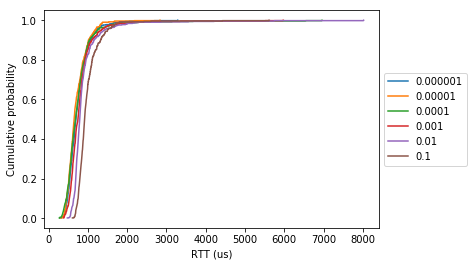

In [27]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num,cvm):
    for i in interval:
        rtt= getrtt('3/10.0.0.6/'+exp+'_'+i,2,num,cvm)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500,cvm)

#### vm2

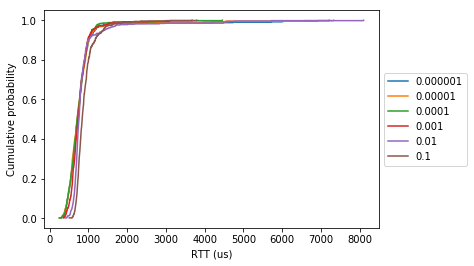

In [28]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num,cvm):
    for i in interval:
        rtt= getrtt('3/10.0.0.7/'+exp+'_'+i,2,num,cvm)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500,cvm)

#### vm3

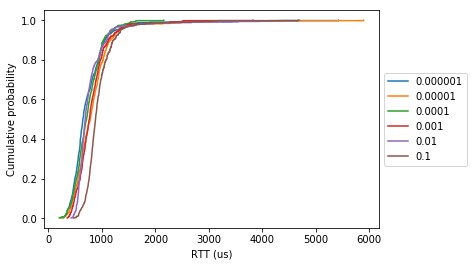

In [29]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num,cvm):
    for i in interval:
        rtt= getrtt('3/10.0.0.8/'+exp+'_'+i,2,num,cvm)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500,cvm)

#### vm4

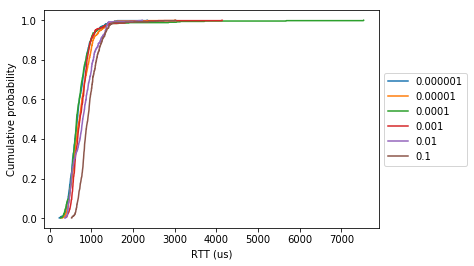

In [30]:
interval=['0.000001', '0.00001', '0.0001','0.001','0.01','0.1']
def graph2(exp,interval,num,cvm):
    for i in interval:
        rtt= getrtt('3/10.0.0.4/'+exp+'_'+i,2,num,cvm)
        values, base = np.histogram(rtt, bins=1000)
        cumulative = np.cumsum(values/float(num))
        plt.plot(base[:-1], cumulative, label=i)
    plt.ylabel("Cumulative probability")
    plt.xlabel("RTT (us)")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
graph2('exp2',interval,500,cvm)

### Experiment 3
Ping 10000 times using flooding.

#### vm1

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine A to Machine B 10000 times using flooding.

In [20]:
ping_cmd = 'ping 192.168.0.2 -c 10000 -i 0'
print local_cmd(ping_cmd + ' | grep -e "transmitted" -e "rtt"')

10000 packets transmitted, 10000 received, 0% packet loss, time 318ms
rtt min/avg/max/mdev = 0.018/0.021/0.161/0.005 ms, ipg/ewma 0.031/0.021 ms



#### 3b B ping A

<font color='red'>TODO:</font> Fill in `ping_cmd`, the command to ping from Machine B to Machine A 10000 times using flooding.

In [21]:
ssh = ssh_connect(machB_ip)
ping_cmd = 'ping 192.168.0.1 -c 10000 -i 0'
print ssh_cmd(ping_cmd+' | grep -e "transmitted" -e "rtt"', ssh)
ssh.close()

10000 packets transmitted, 10000 received, 0% packet loss, time 299ms
rtt min/avg/max/mdev = 0.018/0.020/0.136/0.008 ms, ipg/ewma 0.029/0.020 ms



### Experiment 4
Ping 10000 times using flooding, pinning to core 2.

taskset can be used to launch a command with a given CPU affinity. This means that the process will only run on the list of specified CPU cores.
###### Usage: 
`taskset -c <list of CPU cores> command [arguments]`    

#### A ping B

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine A to Machine B 10000 times using flooding, pinning to core 2.

In [23]:
cmd = 'taskset -c 2 ping 192.168.0.2 -c 10000 -i 0'
print local_cmd(cmd+' | grep -e "transmitted" -e "rtt"')

10000 packets transmitted, 10000 received, 0% packet loss, time 296ms
rtt min/avg/max/mdev = 0.018/0.020/0.156/0.007 ms, ipg/ewma 0.029/0.022 ms



#### B ping A

<font color='red'>TODO:</font> Fill in `cmd`, the command to ping from Machine B to Machine A 10000 times using flooding, pinning to core 2.